Saving train.csv to train (1).csv
✅ Data Loaded Successfully

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
m

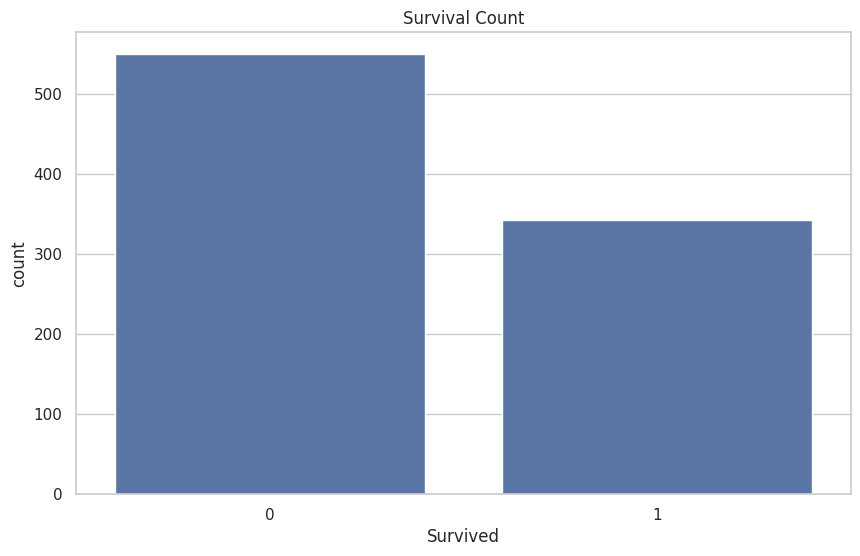

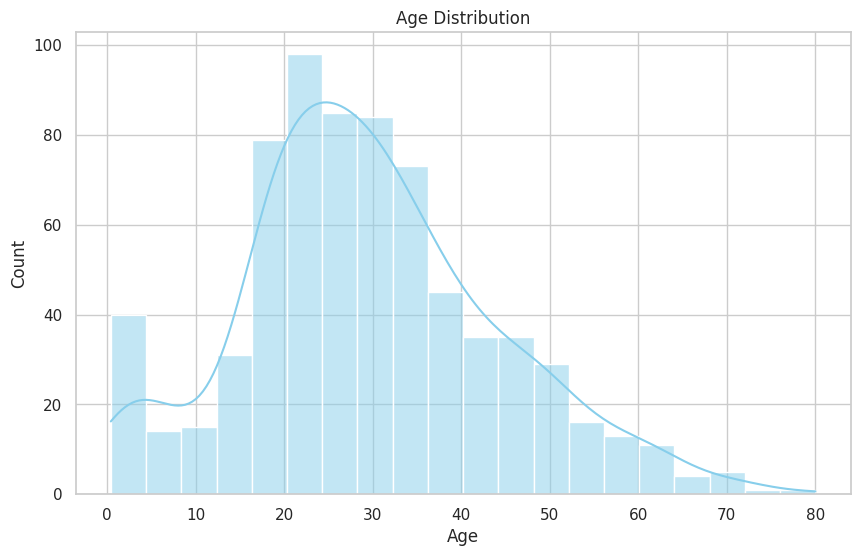

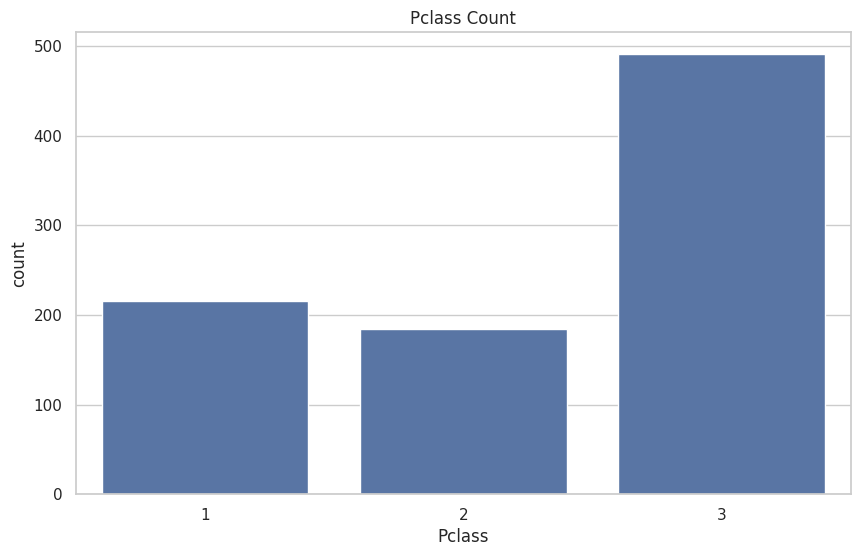

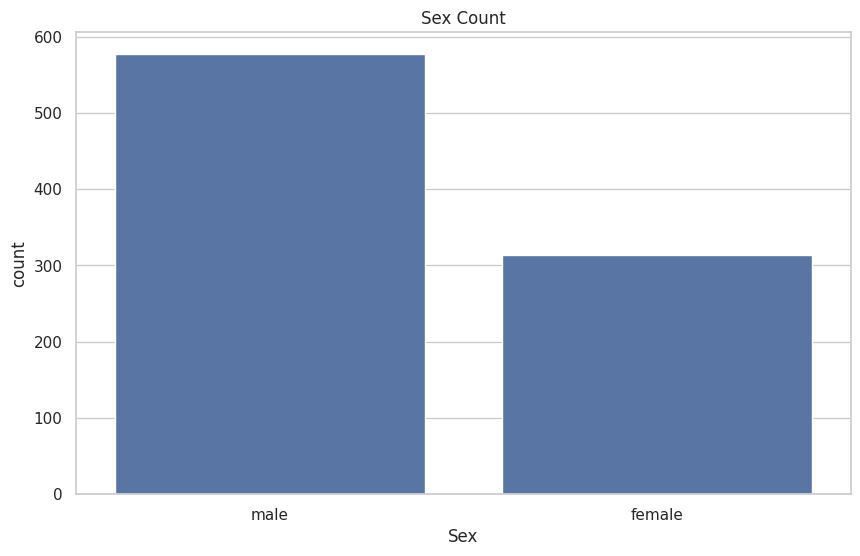

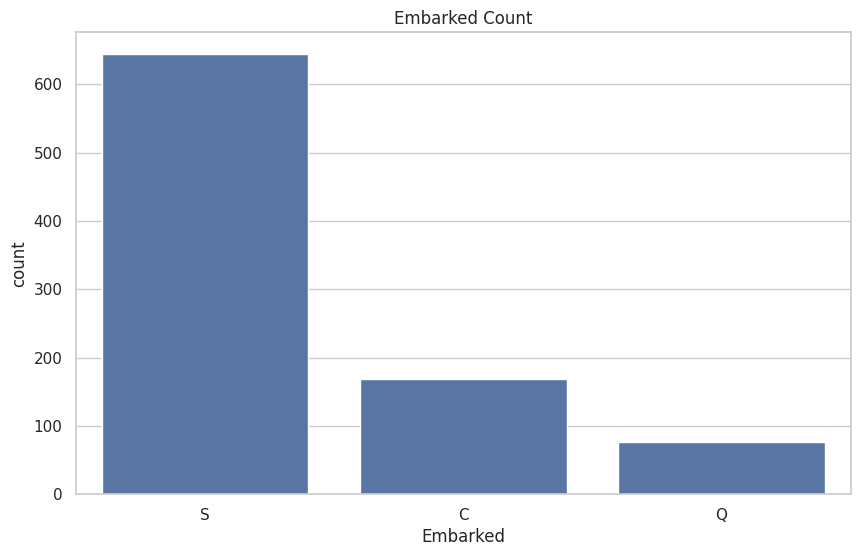


🔸 Bivariate Analysis


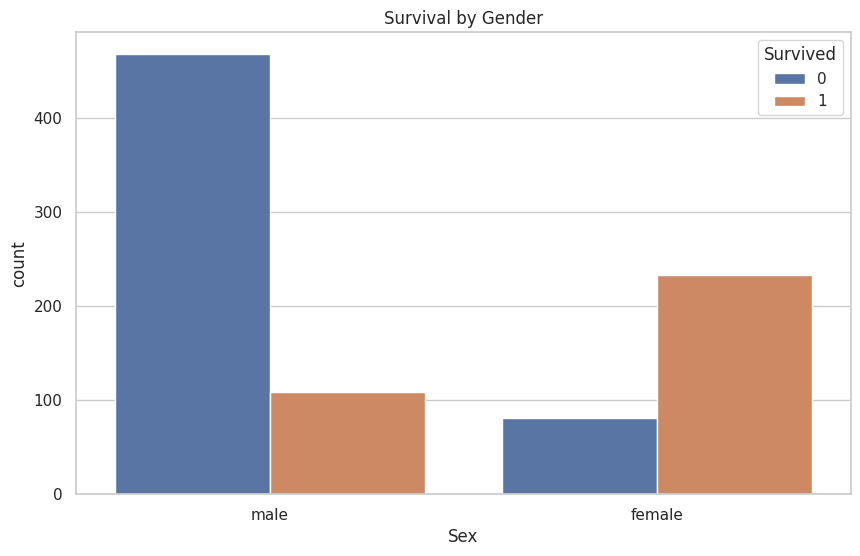

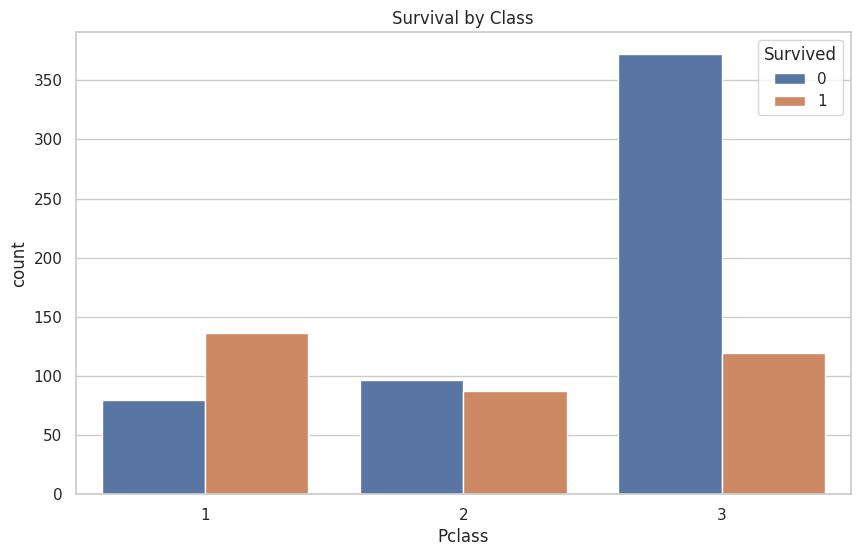

<ipython-input-2-2137636796>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-2-2137636796>:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


✅ Missing Values Handled

🔸 Multivariate Analysis - Pairplot


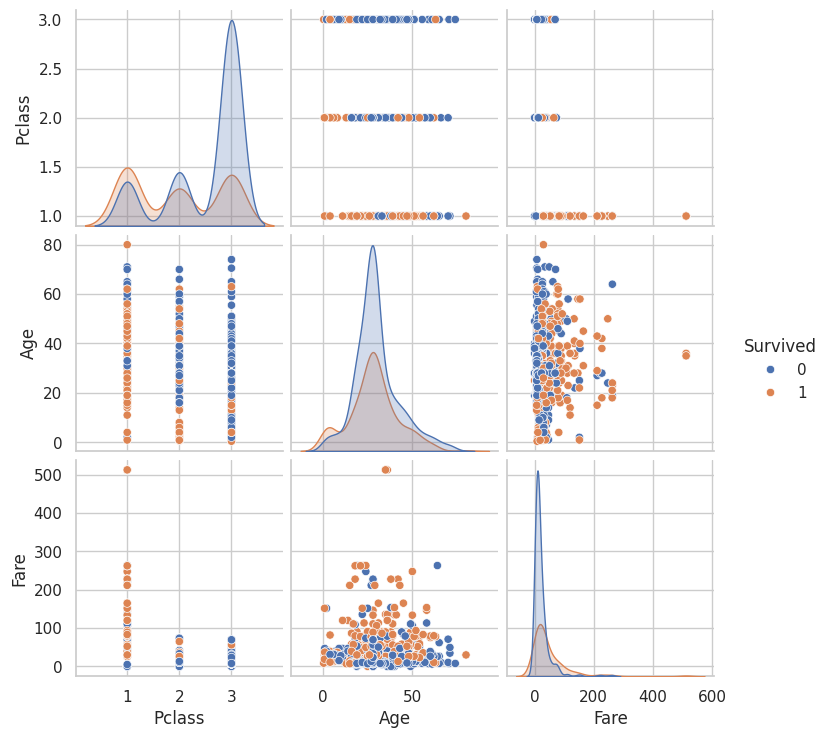


🔸 Correlation Heatmap


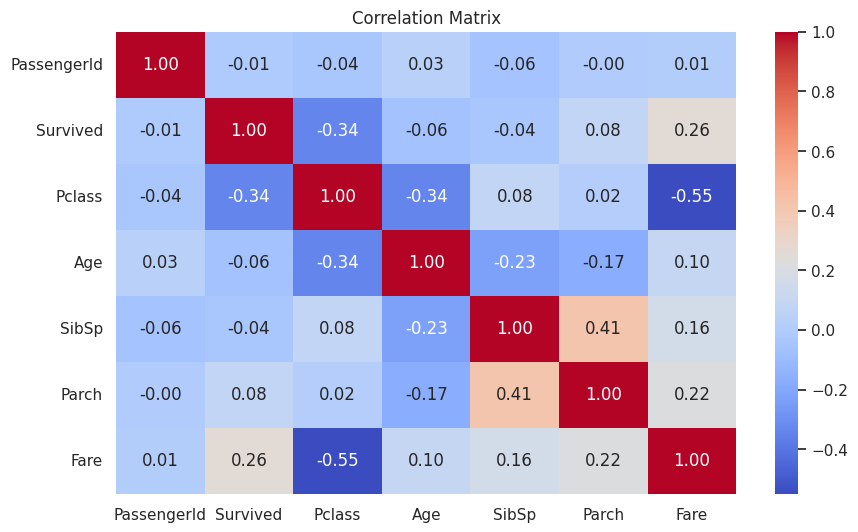


📝 Summary of Key Insights:

1. Women had a higher survival rate than men.
2. Passengers in 1st class were more likely to survive.
3. Younger passengers had better chances of survival.
4. There is a strong correlation between Fare and Pclass.
5. Missing values were mostly in Age, Cabin, and Embarked.



In [2]:
# Task 5 - Exploratory Data Analysis (EDA) on Titanic Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")
print("✅ Data Loaded Successfully")

# Step 3: Basic Info
print("\n🔍 Data Info:")
print(df.info())

print("\n📊 Summary Statistics:")
print(df.describe())

print("\n❗ Missing Values:")
print(df.isnull().sum())

# Step 4: Univariate Analysis
print("\n🔸 Univariate Analysis")
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

for col in ['Pclass', 'Sex', 'Embarked']:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Count")
    plt.show()

# Step 5: Bivariate Analysis
print("\n🔸 Bivariate Analysis")
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

# Step 6: Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)
print("\n✅ Missing Values Handled")

# Step 7: Multivariate Analysis
print("\n🔸 Multivariate Analysis - Pairplot")
# Select only numeric columns for pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

print("\n🔸 Correlation Heatmap")
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 8: Summary of Findings
print("\n📝 Summary of Key Insights:")
print("""
1. Women had a higher survival rate than men.
2. Passengers in 1st class were more likely to survive.
3. Younger passengers had better chances of survival.
4. There is a strong correlation between Fare and Pclass.
5. Missing values were mostly in Age, Cabin, and Embarked.
""")